In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)



In [3]:
# Load the training dataset
train_data = pd.read_csv('../archive/sign_mnist_train.csv')


In [4]:
# Separate the data (features) and the classes
X_train = train_data.drop(["label"], axis=1)  # Features (all columns except the first one)
X_train = X_train / 255.0
y_train = train_data['label']   # Target (first column)

# Create validation dataset by splitting training data (20% for validation)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Model Size, Loss, and Validation Results

Small networks (8 or 16 units) struggle to reduce the loss and end up with low validation accuracy and F1-scores. When the hidden layer becomes larger, the model learns much faster: networks with 32 units or more reach very low loss values and achieve almost perfect validation accuracy and F1-scores. This shows that larger models learn the data better and give much stronger performance.

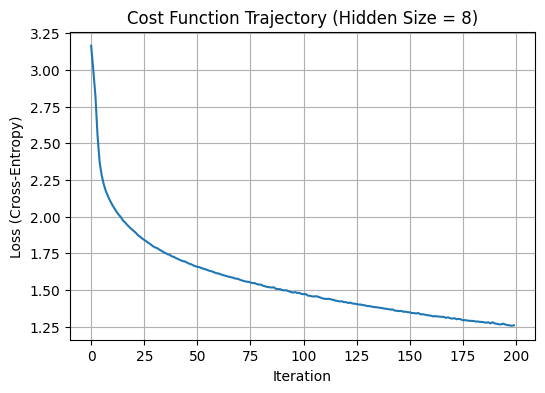

Model converged in 200 iterations.


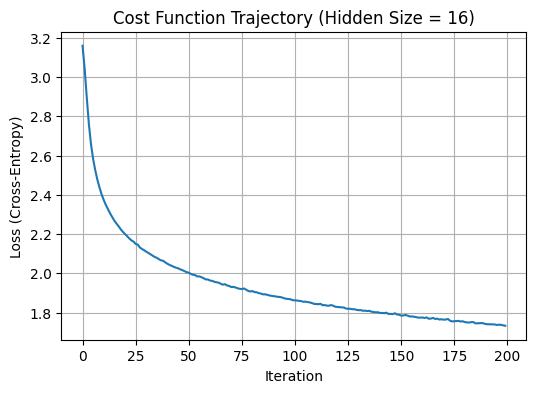

Model converged in 200 iterations.


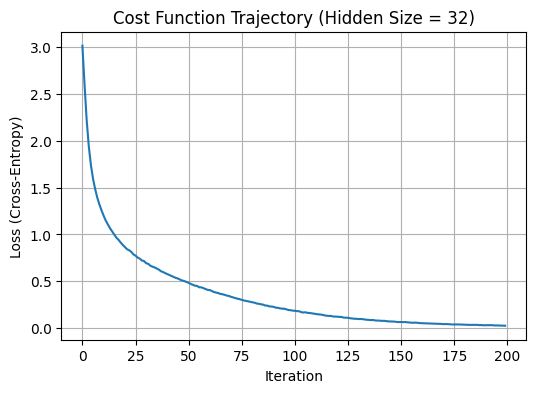

Model converged in 200 iterations.


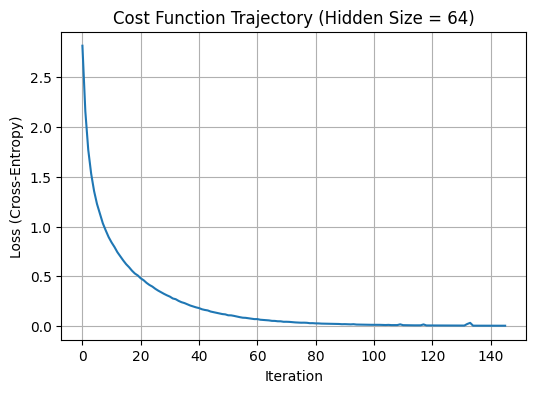

Model converged in 146 iterations.


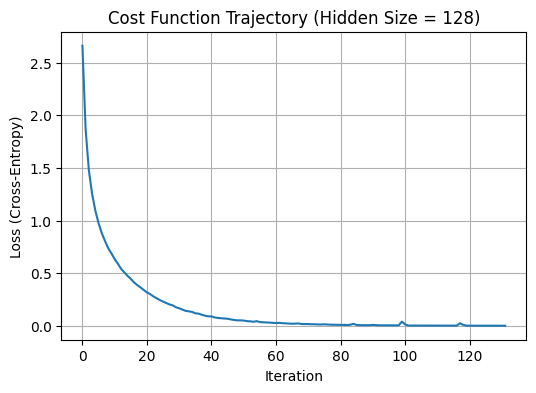

Model converged in 132 iterations.


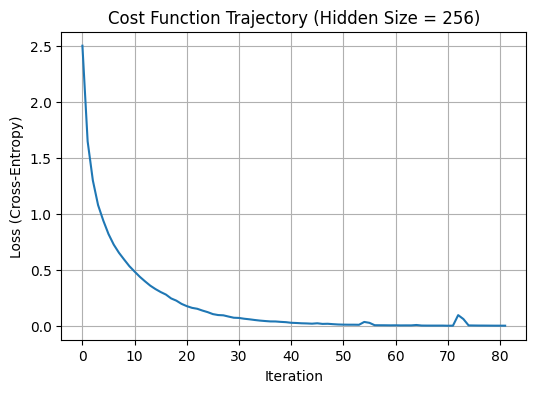

Model converged in 82 iterations.


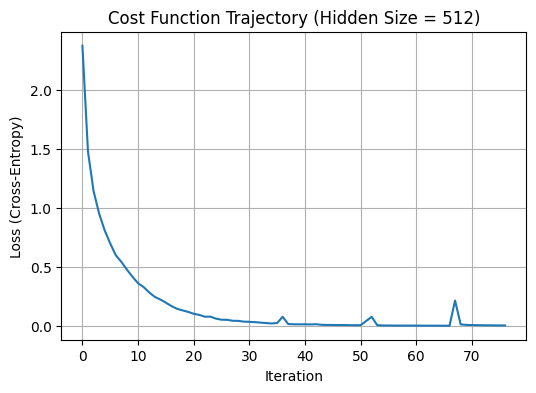

Model converged in 77 iterations.
Hidden=  8 |Train Accuracy=0.5731| Val Accuracy=0.5611 | Val F1=0.5485
Hidden= 16 |Train Accuracy=0.3651| Val Accuracy=0.3453 | Val F1=0.3114
Hidden= 32 |Train Accuracy=0.9978| Val Accuracy=0.9967 | Val F1=0.9967
Hidden= 64 |Train Accuracy=1.0000| Val Accuracy=1.0000 | Val F1=1.0000
Hidden=128 |Train Accuracy=1.0000| Val Accuracy=1.0000 | Val F1=1.0000
Hidden=256 |Train Accuracy=1.0000| Val Accuracy=1.0000 | Val F1=1.0000
Hidden=512 |Train Accuracy=1.0000| Val Accuracy=1.0000 | Val F1=1.0000


In [5]:
hidden_sizes = [8, 16, 32, 64, 128, 256, 512]

val_accs = []
train_accs = []
val_f1s = []

import matplotlib.pyplot as plt

for h in hidden_sizes:
    # print(f"\nTraining model with hidden size = {h}")
    
    model = MLPClassifier(
        hidden_layer_sizes=(h,),
        alpha=0.0001,             # L2 regularization strength
        early_stopping=False,
        n_iter_no_change=10,
        # verbose=True,
        random_state=42
    )
    
    model.fit(X_train, y_train)

    # --------------------------
    # PLOT COST FUNCTION
    # --------------------------
    plt.figure(figsize=(6,4))
    plt.plot(model.loss_curve_)
    plt.title(f"Cost Function Trajectory (Hidden Size = {h})")
    plt.xlabel("Iteration")
    plt.ylabel("Loss (Cross-Entropy)")
    plt.grid(True)
    plt.show()

    # Compute metrics
    acc_tr = model.score(X_train, y_train)
    pred_val = model.predict(X_validate)
    acc = accuracy_score(y_validate, pred_val)
    f1 = f1_score(y_validate, pred_val, average='weighted')
    
    val_accs.append(acc)
    train_accs.append(acc_tr)
    val_f1s.append(f1)


# Print results
for h,tr, a, f in zip(hidden_sizes,train_accs, val_accs, val_f1s):
    print(f"Hidden={h:3d} |Train Accuracy={tr:.4f}| Val Accuracy={a:.4f} | Val F1={f:.4f}")


# Validation Accuracy and F1 Score Plots

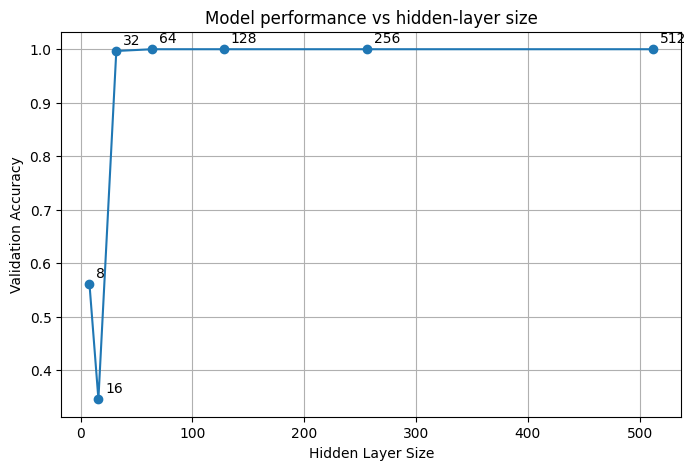

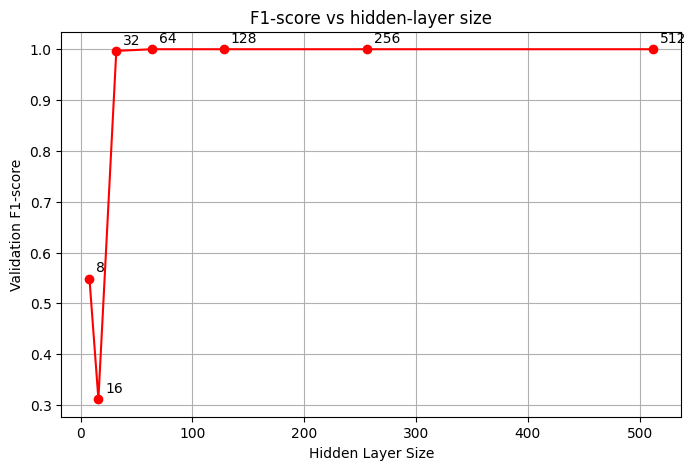

In [7]:
# Plot validation accuracy vs hidden layer size so every sample can be visualized
plt.figure(figsize=(8,5))
plt.plot(hidden_sizes, val_accs, marker='o')
plt.xlabel("Hidden Layer Size")
plt.ylabel("Validation Accuracy")
plt.title("Model performance vs hidden-layer size")
plt.grid(True)

# Add annotations for each point
for i, (x, y) in enumerate(zip(hidden_sizes, val_accs)):
    plt.annotate(f'{x}', 
                (x, y), 
                textcoords="offset points", 
                xytext=(5, 5), 
                ha='left',
                fontsize=10)

plt.show()

plt.figure(figsize=(8,5))
plt.plot(hidden_sizes, val_f1s, marker='o', color='red')
plt.xlabel("Hidden Layer Size")
plt.ylabel("Validation F1-score")
plt.title("F1-score vs hidden-layer size")
plt.grid(True)

# Add annotations for each point
for i, (x, y) in enumerate(zip(hidden_sizes, val_f1s)):
    plt.annotate(f'{x}', 
                (x, y), 
                textcoords="offset points", 
                xytext=(5, 5), 
                ha='left',
                fontsize=10)
plt.show()

